In [648]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import requests

cities = pd.read_csv('data/cities.csv')
providers = pd.read_csv('data/providers.csv')
stations = pd.read_csv('data/stations.csv')
ticket_data = pd.read_csv('data/ticket_data.csv')

# Familiarisation avec les données

Je me familiarise d'abord avec les donées.

Je suppose qu'il n'y a pas de données erronées.


In [649]:
cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [650]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [651]:
stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [652]:
stations.shape[0]

11035

In [653]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [654]:
ticket_data.shape[0]

74168

In [655]:
providers['id'].max()

8389

In [656]:
providers['id'].count()

227

In [657]:
providers['transport_type'].unique()

array(['bus', 'car', 'train', 'carpooling'], dtype=object)

In [658]:
providers['company_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 20, 11, 30, 40, 12])

In [659]:
providers['provider_id'].unique()

array([nan, '31', '33', '37', '41', '45', '47', '49', '57', '65', '77',
       '81', '83', '85', '111', '115', '129', '141', '149', '151', '159',
       '161', '163', '165', '167', '169', '171', '173', '179', '181',
       '185', '189', '195', '203', '205', '207', '209', '213', '215',
       '217', '219', '221', '223', '227', '229', '267', '269', '271',
       '285', '289', '291', '293', '295', '297', '299', '301', '303',
       '307', '315', '319', '321', '323', '325', '327', '329', '331',
       '333', '335', '337', '339', '341', '343', '345', '347', '349',
       '351', '353', '355', '357', '359', '361', '363', '365', '367',
       '369', '371', '373', '375', '377', '379', '381', '383', '385',
       '387', '389', '391', '393', '395', '397', '399', '401', '403',
       '405', '407', '409', '411', '413', '415', '417', '419', '421',
       '423', '425', '427', '429', '431', '433', '435', '437', '439',
       '441', '443', '445', '447', '449', '451', '453', '455', '457',
       '459', 

In [639]:
providers['id'].unique()

array([   9,   10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
         20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,
         31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   43,   44,   45,   46,   47,   48,   49,   50,   51,   52,
         53,   54,   55,   56,   57,   58,   59,   60,   61,   62,   63,
         64,   66,   67,   68,   69,   70,   71,   72,   73,   75,   79,
         80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
        113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,
        146,  147,  148,  149,  150,  151,  152,  153,  154,  155,  156,
        157,  158,  159,  160,  161,  162,  163,  1

# Quelques stats basiques sur les tickets

### Les prix

In [264]:
print("Prix max : " + str(ticket_data['price_in_cents'].max()/100) + " euros")
print("Prix min : " + str(ticket_data['price_in_cents'].min()/100) + " euros")
print("Prix moyen : " + str(round(ticket_data['price_in_cents'].mean()/100, 1)) + " euros")

Prix max : 385.5 euros
Prix min : 3.0 euros
Prix moyen : 43.8 euros


### La durée

In [265]:
ticket_data['departure_ts2'] = pd.to_datetime(ticket_data['departure_ts'], format='%Y-%m-%d %H:%M:%S')
ticket_data['arrival_ts2'] = pd.to_datetime(ticket_data['arrival_ts'], format='%Y-%m-%d %H:%M:%S')
ticket_data['duree'] = ticket_data['arrival_ts2'] - ticket_data['departure_ts2']

In [266]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0 days 06:10:00
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00


In [267]:
print("Durée max : " + str(ticket_data['duree'].max()))
print("Durée min : " + str(ticket_data['duree'].min()))
print("Durée moyenne : " + str(ticket_data['duree'].mean()))

Durée max : 20 days 12:51:00
Durée min : 0 days 00:20:00
Durée moyenne : 0 days 07:04:37.247600043


Je m'assure ici de bien comprendre à quoi correspondent les colonnes 'id' des dataframes stations et cities, qu'on peut faire des jointures dessus.

Et je supprime les colonnes 'departure_ts', 'arrival_ts', 'search_ts' en créant une nouvelle dataframe new_ticket_data pour une meilleure visibilité. Cette dataframe va contenir les lattitudes et longitudes des stations de départ et d'arrivée.

In [268]:
new_ticket_data = ticket_data.drop(['departure_ts', 'arrival_ts', 'search_ts'], axis=1)
new_ticket_data.sort_values(by='o_station').head()


,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
11043,6806074,13,3.0,509.0,3090,"{598,598}",{13},628,712,2017-10-06 10:00:00+00:00,2017-10-06 19:40:00+00:00,0 days 09:40:00
33895,6828920,13,3.0,273.0,4000,"{173,173}",{13},628,23,2017-10-13 22:55:00+00:00,2017-10-14 09:00:00+00:00,0 days 10:05:00
34230,6829254,13,3.0,489.0,2000,"{304,304}",{13},628,587,2017-10-30 02:40:00+00:00,2017-10-30 12:35:00+00:00,0 days 09:55:00
34334,6829330,13,3.0,489.0,2000,"{304,304}",{13},628,587,2017-10-30 02:40:00+00:00,2017-10-30 12:35:00+00:00,0 days 09:55:00
34377,6829400,13,3.0,489.0,2000,"{304,304}",{13},628,587,2017-10-30 02:40:00+00:00,2017-10-30 12:35:00+00:00,0 days 09:55:00


In [269]:
new_ticket_data.shape[0]

74168

In [270]:
print(stations.loc[stations['id'] == 63])
print(stations.loc[stations['id'] == 1044])
print(stations.loc[stations['id'] == 5905])
print(stations.loc[stations['id'] == 6495])
print(cities.loc[cities['id'] == 611])
print(cities.loc[cities['id'] == 542])

    id              unique_name   latitude  longitude
62  63  Avenue Georges Pompidou  47.896911   1.854277
        id          unique_name   latitude  longitude
1043  1044  Station Les Sabines  43.583932   3.860233
        id  unique_name  latitude  longitude
5904  5905  Les Aubrais  47.92674    1.90674
        id  unique_name  latitude  longitude
6494  6495  Montpellier   43.6049     3.8805
       id                            local_name unique_name   latitude  \
4070  611  Orléans, Centre-Val de Loire, France     orleans  47.907018   

      longitude  population  
4070    1.90627    114977.0  
       id                      local_name  unique_name   latitude  longitude  \
2630  542  Montpellier, Occitanie, France  montpellier  43.604452   3.918318   

      population  
2630    275318.0  


In [271]:
new_ticket_data = pd.merge(stations, new_ticket_data, left_on='id', right_on='o_station') 
new_ticket_data.shape[0] # ne correspond pas a la taille originale de ticket_data de 74168 lignes, car une partie de la colonne 'o_station' contient des Nans comme demontre dans la cellule d'apres, 
# ceux-ci ne sont pas pris en compte lors de la jointure

32727

In [272]:
ticket_data['o_station'].isna().sum()

41441

In [273]:
new_ticket_data.rename(columns={'old_name': 'new_name', 'latitude':'lat1', 'longitude':'lon1'}, inplace=True)
new_ticket_data.sort_values(by='o_station').head()

,id_x,unique_name,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
0,3,Aéroport CDG,49.0099,2.55931,6795079,9,3.0,396.0,1590,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00
170,3,Aéroport CDG,49.0099,2.55931,6839803,13,3.0,304.0,2890,"{863,863}",{13},628,562,2017-10-21 15:30:00+00:00,2017-10-22 08:00:00+00:00,0 days 16:30:00
171,3,Aéroport CDG,49.0099,2.55931,6840176,13,3.0,39.0,1200,"{396,396}",{13},628,37,2017-10-26 12:20:00+00:00,2017-10-26 19:40:00+00:00,0 days 07:20:00
172,3,Aéroport CDG,49.0099,2.55931,6840179,13,3.0,39.0,1590,"{396,396}",{13},628,37,2017-10-26 14:30:00+00:00,2017-10-26 21:15:00+00:00,0 days 06:45:00
173,3,Aéroport CDG,49.0099,2.55931,6840175,9,3.0,39.0,1600,"{396,396}",{13},628,37,2017-10-26 13:05:00+00:00,2017-10-26 19:40:00+00:00,0 days 06:35:00


In [274]:
new_ticket_data.shape[0]

32727

In [211]:
new_ticket_data = pd.merge(stations, new_ticket_data, left_on='id', right_on='d_station')
new_ticket_data.rename(columns={'latitude':'lat2', 'longitude':'lon2'}, inplace=True)
new_ticket_data = new_ticket_data.drop(['unique_name_x', 'unique_name_y'], axis=1)
new_ticket_data.sort_values(by='o_station').head()

,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
31146,8926,52.421347,13.177278,3,49.0099,2.55931,6795457,13,3.0,8926.0,4750,"{475,475}",{13},628,99,2017-10-21 22:10:00+00:00,2017-10-22 15:20:00+00:00,0 days 17:10:00
7856,396,50.638756,3.076675,3,49.0099,2.55931,6807925,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00
7857,396,50.638756,3.076675,3,49.0099,2.55931,6808616,9,3.0,396.0,1590,"{406,406}",{13},628,453,2017-10-13 12:30:00+00:00,2017-10-13 16:40:00+00:00,0 days 04:10:00
7858,396,50.638756,3.076675,3,49.0099,2.55931,6808874,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00
7859,396,50.638756,3.076675,3,49.0099,2.55931,6809472,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00



# Calcul des distances

J'utilise ici la formule de Haversine, pour un calcul des distances entre la station de départ et d'arrivée à vol d'oiseau.

In [212]:
def distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    a = sin((lat2 - lat1) / 2) ** 2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c

    return distance

new_ticket_data['distance'] = new_ticket_data.apply(lambda row: distance(row['lat1'], row['lon1'], row['lat2'], row['lon2']), axis=1)
new_ticket_data.sort_values(by='o_station').head()

,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,distance
31146,8926,52.421347,13.177278,3,49.0099,2.55931,6795457,13,3.0,8926.0,4750,"{475,475}",{13},628,99,2017-10-21 22:10:00+00:00,2017-10-22 15:20:00+00:00,0 days 17:10:00,837.18529
7856,396,50.638756,3.076675,3,49.0099,2.55931,6807925,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00,184.88257
7857,396,50.638756,3.076675,3,49.0099,2.55931,6808616,9,3.0,396.0,1590,"{406,406}",{13},628,453,2017-10-13 12:30:00+00:00,2017-10-13 16:40:00+00:00,0 days 04:10:00,184.88257
7858,396,50.638756,3.076675,3,49.0099,2.55931,6808874,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00,184.88257
7859,396,50.638756,3.076675,3,49.0099,2.55931,6809472,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00,184.88257


Distance max : 1865.5 km
Distance min : 16.6 km
Distance moyenne : 432.8 km


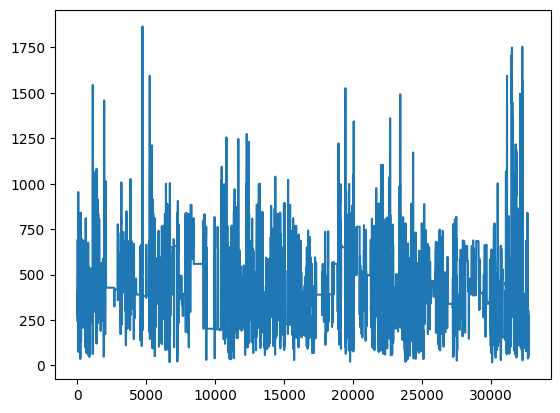

In [134]:
plt.plot(new_ticket_data['distance'])
print("Distance max : " + str(round(new_ticket_data['distance'].max(), 1)) + " km")
print("Distance min : " + str(round(new_ticket_data['distance'].min(), 1)) + " km")
print("Distance moyenne : " + str(round(new_ticket_data['distance'].mean(), 1)) + " km")

# Calcul des distances avec l'API MapBox

La formule Haversine donne bien sûr une idée des distances, mais les routes sont rarement des lignes droites, donc je vais utiliser une API pour mesurer les distances d'une façon plus précise.

J'ai considéré l'utilisation de l'API de Google Maps ou celle de MapBox et ai choisi la dernière, car sa documentation et son utilisation m'ont paru plus claires. C'est la première fois que j'utilise cette API.

In [20]:
token = 'pk.eyJ1IjoicmFuZHltYWdudW0iLCJhIjoiY2xmZnlidm53MTE2NzQ2bHI2NDZzczhpNyJ9.tgeKBJ2IC3ZpI1Y_ucePGw'

Nombre de lignes de new_tiket_data, pour s'assurer que tout marche bien par la suite.

In [20]:
new_ticket_data.shape[0]

32727

## Appel à l'API

Il se peut que le quota de requêtes à l'API soit dépassé

Donc pour éviter l'utilisation de l'API exécuter la ligne suivante :

In [213]:
new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')

In [22]:
# Appel API
# ne pas exécuter si on a fait new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')

def calcule_distance(df, token, limit):
        count = 0
        result = []
        for index, row in df.iterrows():
                url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
                url = url + str(row['lon1']) + ',' + str(row['lat1']) + ';' + str(row['lon2']) + ',' + str(row['lat2'])
                params = {'access_token': token}

                response = requests.get(url, params=params)

                
                data = response.json()
                
                # si l'API n'arrive pas a calculer la distance
                if (data['code'] == 'NoSegment'): 
                        result.append([row['lon1'], row['lat1'], row['lon2'], row['lat2']], 'NaN' 'Nan')
                # si tout se passe bien
                else:
                        distance = data['routes'][0]['distance']/1000 # pour un resultat en km
                        duration = data['routes'][0]['duration']/3600 # pour un resultat en heures
                        result.append([row['lon1'], row['lat1'], row['lon2'], row['lat2'], distance, duration])
                        count = count + 1
                        if (count >= limit):
                                print("Nombre limite de requetes atteint.")
                                return result
                if (count%1000 == 0):
                        print(str(count) + " lignes traitees")
        print("La dataframe a ete entierement traitee.")
        return result


res = calcule_distance(new_ticket_data.sort_values(by='lon1'), token, 33000) # on limite a 33000 pour couvrir toute la dataframe new_ticket_data qui fait 32727 lignes
# les calculs ont pris 27m 53.7s

1000 lignes traitees
2000 lignes traitees
3000 lignes traitees
4000 lignes traitees
5000 lignes traitees
6000 lignes traitees
7000 lignes traitees
8000 lignes traitees
9000 lignes traitees
10000 lignes traitees
11000 lignes traitees
12000 lignes traitees
13000 lignes traitees
14000 lignes traitees
15000 lignes traitees
16000 lignes traitees
17000 lignes traitees
18000 lignes traitees
19000 lignes traitees
20000 lignes traitees
21000 lignes traitees
22000 lignes traitees
23000 lignes traitees
24000 lignes traitees
25000 lignes traitees
26000 lignes traitees
27000 lignes traitees
28000 lignes traitees
29000 lignes traitees
30000 lignes traitees
31000 lignes traitees
32000 lignes traitees
La dataframe a ete entierement traitee.


On s'assure que la liste avec les distances et durées issues de la MapBox API est bien remplie.

In [23]:
# ne pas exécuter si on a fait new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')

len(res)

32727

In [24]:
# ne pas exécuter si on a fait new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')
new_ticket_data.sort_values(by='lon1').head()

,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,distance
31552,9985,38.767842,-9.099345,10185,41.144308,-8.605693,6801795,13,10185.0,9985.0,8490,"{896,896}",{13},2245,1918,2017-10-06 06:50:00+00:00,2017-10-07 15:40:00+00:00,1 days 08:50:00,267.578375
3176,273,52.389289,4.836263,422,48.387490,-4.482140,6848501,13,422.0,273.0,7390,"{279,279}",{13},148,23,2017-12-29 09:10:00+00:00,2017-12-30 14:25:00+00:00,1 days 05:15:00,795.562246
6126,322,50.624050,5.568636,422,48.387490,-4.482140,6818028,8376,422.0,322.0,13700,"{6799,1898}",{8384},148,451,2017-10-25 11:30:00+00:00,2017-10-25 20:11:00+00:00,0 days 08:41:00,766.430573
6127,322,50.624050,5.568636,422,48.387490,-4.482140,6818029,8376,422.0,322.0,10200,"{6799,1898}",{8384},148,451,2017-10-25 09:06:00+00:00,2017-10-25 18:11:00+00:00,0 days 09:05:00,766.430573
6128,322,50.624050,5.568636,422,48.387490,-4.482140,6818030,8376,422.0,322.0,14000,"{6799,1898}",{8384},148,451,2017-10-25 12:21:00+00:00,2017-10-25 20:11:00+00:00,0 days 07:50:00,766.430573


In [21]:
#new_ticket_data.to_csv('ticket_data_MapBoxAPI.csv', index=False)
new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')

In [ ]:
# ne pas exécuter si on a fait new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')

distance_MapBox = []
duree_MapBox = []
for i in res:
    distance_MapBox.append(i[4])
    duree_MapBox.append(i[5])
print(len(distance_MapBox))
print(distance_MapBox[0:20])

new_ticket_data = new_ticket_data.sort_values(by='lon1')

new_ticket_data['distance_MapBox'] = distance_MapBox
new_ticket_data['duree_MapBox'] = duree_MapBox

new_ticket_data.head()

On remarque que les dsitances réelles sont plus importantes que celles d'à vol d'oiseau. Dans mes calculs je n'ai pas pris en compte les escales qui pourraient encore plus rallonger les distances.

On remarque aussi que dans certains cas la durée de voyage proposée par MaxBox est très inférieure à celle déjà présente dans la base de données. Ceci est dû aux arrêts et aux escales qui ne sont pas pris en compte dans mes calculs. Et aussi, la voiture est en général plus rapide que le bus, et tous les trajets que j'ai calculés sont calculés pour des voitures.

In [34]:
# ne pas exécuter si on a fait new_ticket_data = pd.read_csv('ticket_data_MapBoxAPI.csv')
resres = res

Distribution des distances

(array([ 5328., 10149.,  9033.,  6034.,  1497.,   417.,   161.,    47.,
           47.,    14.]),
 array([  23.983,  252.049,  480.115,  708.181,  936.247, 1164.313,
        1392.379, 1620.445, 1848.511, 2076.577, 2304.643]),
 <BarContainer object of 10 artists>)

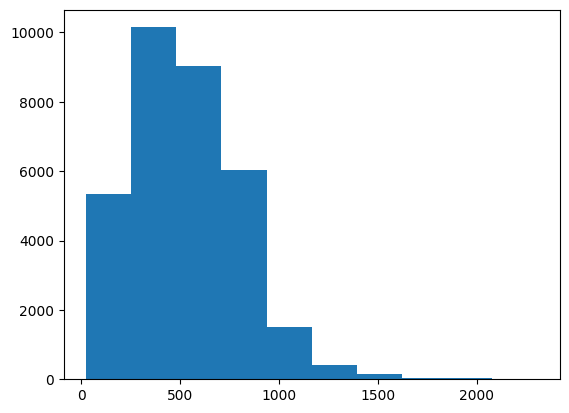

In [25]:
#bins = [200, 800, 2000, 3000]
#plt.hist(new_ticket_data['distance_MapBox'], bins=bins)
plt.hist(new_ticket_data['distance_MapBox'])

On remarque que la majorité des distances ont des valeurs autours de 500km.

Text(0, 0.5, 'Prix en euros')

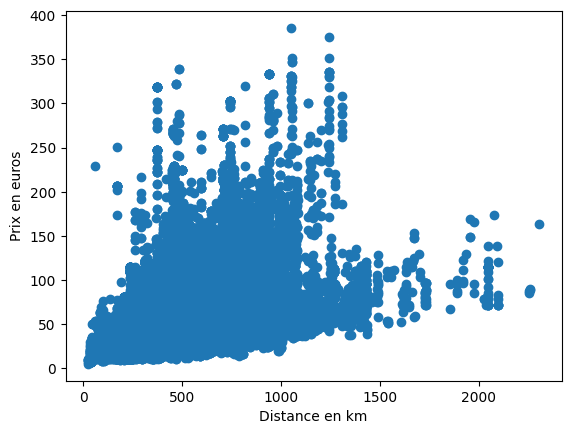

In [26]:
plt.scatter(new_ticket_data['distance_MapBox'], new_ticket_data['price_in_cents']/100)
plt.xlabel("Distance en km")
plt.ylabel("Prix en euros")

Valeurs moyennes en fonction des intervalles de distance

In [27]:
new_ticket_data2 = new_ticket_data
new_ticket_data2['itervalles'] = pd.cut(new_ticket_data2['distance_MapBox'], bins=[0, 200, 800, 2000, 3000])
grouped_df = new_ticket_data2.groupby('itervalles').mean()
grouped_df.head()

/var/folders/0z/w1l_87jn51n4k1h6nsn55y5c0000gn/T/ipykernel_1393/3798616785.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = new_ticket_data2.groupby('itervalles').mean()


,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,o_city,d_city,distance,distance_MapBox,duree_MapBox
itervalles,,,,,,,,,,,,,,,,
"(0, 200]",3271.514238,47.101594,3.110729,3146.837521,46.985250,3.110439,6.834058e+06,5962.811390,3146.837521,3271.514238,2726.360469,1449.170519,2408.929983,116.912923,142.981116,1.625819
"(200, 800]",2246.007974,47.826769,2.855566,2985.729639,47.676886,2.829759,6.835400e+06,5694.669854,2985.729639,2246.007974,6475.099893,754.238902,795.423573,406.355476,505.432186,5.018264
"(800, 2000]",2239.765754,46.137405,3.821355,2327.333556,47.214770,3.048711,6.831367e+06,4055.942329,2327.333556,2239.765754,8824.425295,936.321309,818.899354,778.548662,1001.628014,9.620623
"(2000, 3000]",9067.545455,40.456485,-3.367297,797.250000,50.306588,4.683327,6.826175e+06,5902.250000,797.250000,9067.545455,9819.204545,545.931818,2743.863636,1704.504908,2080.311253,20.235234


# Quels pays sont les plus représentés dans les données ?

Pour cela il faut faire une jointure entre les dataframes ticket_data (version originale) et celle de cities qui contient le nom de pays dans laquelle se trouve la station d'arrivée ou de départ.

In [135]:
ticket_data.shape[0]

74168

In [139]:
ticket_data_countries = pd.merge(ticket_data, cities, left_on='o_city', right_on='id')
ticket_data_countries.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,d_city,departure_ts2,arrival_ts2,duree,id_y,local_name,unique_name,latitude,longitude,population
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,542,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0 days 06:10:00,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,542,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,542,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,542,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,542,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0


In [140]:
ticket_data_countries = ticket_data_countries.drop(['unique_name', 'population', 'latitude', 'longitude'], axis=1) # pas besoin de ces colonnes
ticket_data_countries.rename(columns={'local_name': 'o_country'}, inplace=True)
ticket_data_countries.head()


,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,id_y,o_country
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0 days 06:10:00,611,"Orléans, Centre-Val de Loire, France"
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00,611,"Orléans, Centre-Val de Loire, France"
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00,611,"Orléans, Centre-Val de Loire, France"
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00,611,"Orléans, Centre-Val de Loire, France"
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00,611,"Orléans, Centre-Val de Loire, France"


In [141]:
# on ajoute les villes, pays destinations
ticket_data_countries = pd.merge(ticket_data_countries, cities, left_on='d_city', right_on='id')
ticket_data_countries.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,arrival_ts2,duree,id_y,o_country,id,local_name,unique_name,latitude,longitude,population
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,2017-10-13 20:10:00+00:00,0 days 06:10:00,611,"Orléans, Centre-Val de Loire, France",542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,2017-10-14 06:55:00+00:00,0 days 17:50:00,611,"Orléans, Centre-Val de Loire, France",542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,2017-10-14 21:24:00+00:00,1 days 07:57:00,611,"Orléans, Centre-Val de Loire, France",542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,2017-10-14 11:02:00+00:00,0 days 21:35:00,611,"Orléans, Centre-Val de Loire, France",542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,2017-10-14 19:32:00+00:00,0 days 21:46:00,611,"Orléans, Centre-Val de Loire, France",542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0


In [142]:
ticket_data_countries = ticket_data_countries.drop(['unique_name', 'population', 'latitude', 'longitude', 'id', 'id_y'], axis=1) # pas besoin de ces colonnes
ticket_data_countries.rename(columns={'local_name': 'd_country'}, inplace=True)
ticket_data_countries.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,o_country,d_country
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0 days 06:10:00,"Orléans, Centre-Val de Loire, France","Montpellier, Occitanie, France"
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00,"Orléans, Centre-Val de Loire, France","Montpellier, Occitanie, France"
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00,"Orléans, Centre-Val de Loire, France","Montpellier, Occitanie, France"
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00,"Orléans, Centre-Val de Loire, France","Montpellier, Occitanie, France"
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00,"Orléans, Centre-Val de Loire, France","Montpellier, Occitanie, France"


In [168]:
ticket_data_countries['o_country'] = ticket_data_countries['o_country'].str.split(',').str[-1].str.strip()
ticket_data_countries['d_country'] = ticket_data_countries['d_country'].str.split(',').str[-1].str.strip()

# certains pays ont plusieurs noms dans le tableau
ticket_data_countries['o_country'] = ticket_data_countries['o_country'].replace('UK', 'United Kingdom')
ticket_data_countries['d_country'] = ticket_data_countries['d_country'].replace('UK', 'United Kingdom')
ticket_data_countries['o_country'] = ticket_data_countries['o_country'].replace('Belgïe - Belgique - Belgien', 'Belgique')
ticket_data_countries['d_country'] = ticket_data_countries['d_country'].replace('Belgïe - Belgique - Belgien', 'Belgique')
ticket_data_countries['o_country'] = ticket_data_countries['o_country'].replace('Svizra', 'Schweiz') # je decouvre grace a cet exercice comment s'appelle la Suisse en Romanche
ticket_data_countries['d_country'] = ticket_data_countries['d_country'].replace('Svizra', 'Schweiz')

Maintenant la dataframe ticket_data_countries est prête pour faire des stats sur les pays.

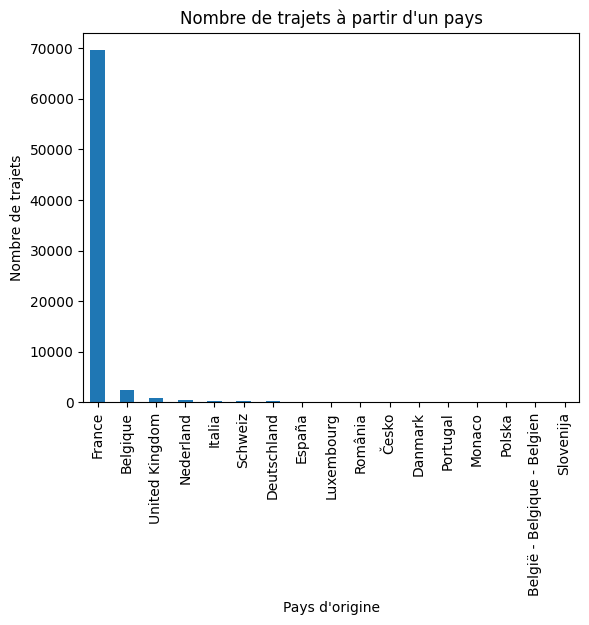

In [170]:
histogramme_o = ticket_data_countries['o_country'].value_counts()
histogramme_o.plot(kind='bar')
plt.xlabel("Pays d'origine")
plt.ylabel("Nombre de trajets")
plt.title("Nombre de trajets à partir d'un pays")
plt.show()

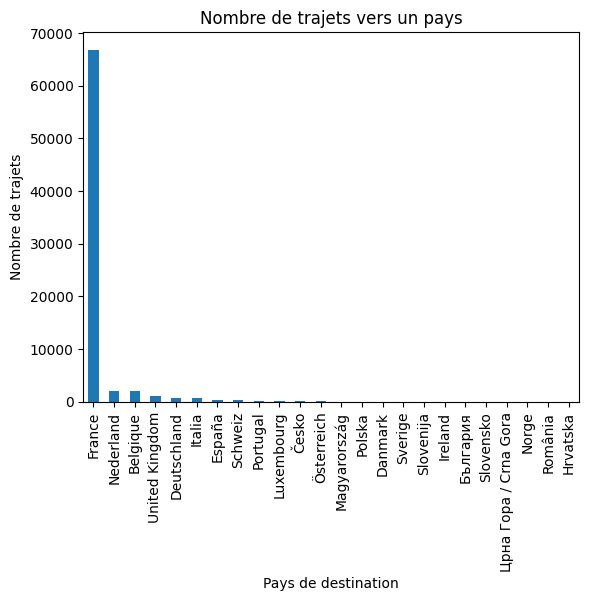

In [171]:
histogramme_d = ticket_data_countries['d_country'].value_counts()
histogramme_d.plot(kind='bar')
plt.xlabel("Pays de destination")
plt.ylabel("Nombre de trajets")
plt.title("Nombre de trajets vers un pays")
plt.show()

Bon, on voit facilement que la majeure partie des trajets commence ou finit en France.

Si l'on exclut la France de l'histogramme :

In [172]:
histogramme_sans_france = ticket_data_countries[ticket_data_countries['o_country'] != "France"]
histogramme_sans_france_d = ticket_data_countries[ticket_data_countries['d_country'] != "France"]

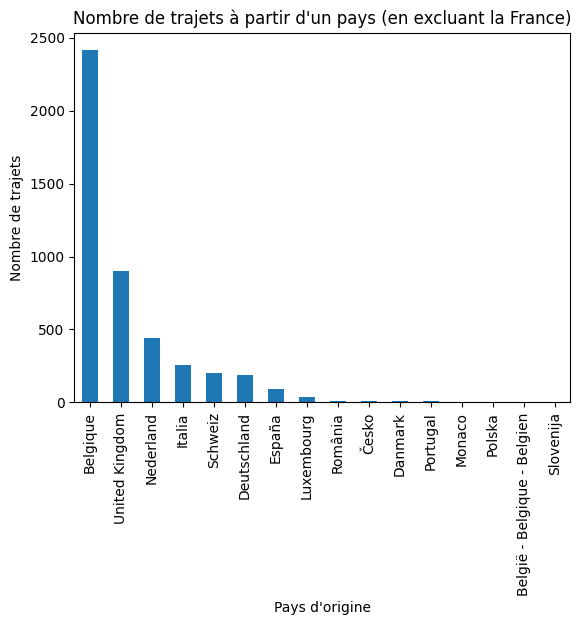

In [173]:
histogramme_sans_france = histogramme_sans_france['o_country'].value_counts()
histogramme_sans_france.plot(kind='bar')
plt.xlabel("Pays d'origine")
plt.ylabel("Nombre de trajets")
plt.title("Nombre de trajets à partir d'un pays (en excluant la France)")
plt.show()

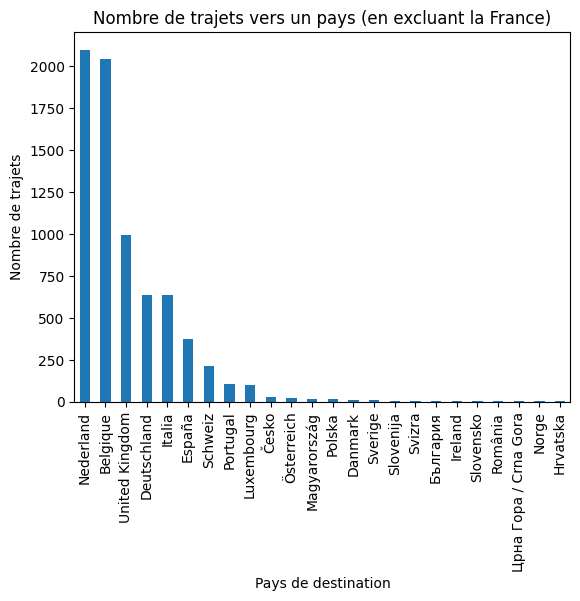

In [165]:
histogramme_sans_france_d = histogramme_sans_france_d['d_country'].value_counts()
histogramme_sans_france_d.plot(kind='bar')
plt.xlabel("Pays de destination")
plt.ylabel("Nombre de trajets")
plt.title("Nombre de trajets vers un pays (en excluant la France)")
plt.show()

Les pays les plus représentés sont ceux qui sont voisins (ou presque comme les Pays-Bays) de la France - logique.

On peut remarquer aussi que le nombre de pays de destination est plus élevé que celui des origines de trajets. Les Français ne reviennent pas des pays comme l'Autriche, la Norvège ou la Croatie ?
Et les Monégasques ne rentrent jamais chez eux.

# De quoi dépendent les prix ?

### Partie I - Introduction

Pour comprendre la formation des prix je vais calculer la correlation entre les valeurs des différentes colonnes. Je reprends le dataframe résultant du calcul des distances avec l'API MapBox.

In [660]:
ticket_data_distance = pd.read_csv('ticket_data_MapBoxAPI.csv')
ticket_data_distance.columns

Index(['id', 'lat2', 'lon2', 'id_x', 'lat1', 'lon1', 'id_y', 'company',
       'o_station', 'd_station', 'price_in_cents', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'departure_ts2', 'arrival_ts2',
       'duree', 'distance', 'distance_MapBox', 'duree_MapBox', 'itervalles'],
      dtype='object')

In [661]:
ticket_data_distance.drop(['lat2', 'lon2', 'id_x', 'lat1', 'lon1', 'itervalles', 'id'], axis=1, inplace=True)
ticket_data_distance.rename(columns={'departure_ts2': 'departure_ts', 'arrival_ts2':'arrival_ts', 'id_y': 'id'}, inplace=True)
ticket_data_distance.sort_values(by='id').head()

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,duree,distance,distance_MapBox,duree_MapBox
7100,6795026,9,63.0,1044.0,1450,"{149,418}",{13},611,542,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00,504.165333,619.265562,5.726119
7298,6795027,8377,5905.0,6495.0,7400,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00,504.318452,631.996688,5.992212
7297,6795028,8377,5905.0,6495.0,13500,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00,504.318452,631.996688,5.992212
7296,6795029,8381,5905.0,6495.0,7710,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00,504.318452,631.996688,5.992212
7845,6795074,13,767.0,396.0,1990,"{932,932}",{13},628,453,2017-10-06 05:25:00+00:00,2017-10-06 16:40:00+00:00,0 days 11:15:00,220.384948,241.217703,2.792912


Je fais revenir la colonne 'search_ts'.

In [662]:
ticket_data_distance = pd.merge(ticket_data_distance, ticket_data[['id', 'search_ts']], on='id', how='left')
ticket_data_distance.head()

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,duree,distance,distance_MapBox,duree_MapBox,search_ts
0,6801795,13,10185.0,9985.0,8490,"{896,896}",{13},2245,1918,2017-10-06 06:50:00+00:00,2017-10-07 15:40:00+00:00,1 days 08:50:00,267.578375,307.842125,2.958007,2017-10-03 14:49:19.965+00
1,6848501,13,422.0,273.0,7390,"{279,279}",{13},148,23,2017-12-29 09:10:00+00:00,2017-12-30 14:25:00+00:00,1 days 05:15:00,795.562246,1053.282875,10.348936,2017-10-14 21:33:52.691+00
2,6818028,8376,422.0,322.0,13700,"{6799,1898}",{8384},148,451,2017-10-25 11:30:00+00:00,2017-10-25 20:11:00+00:00,0 days 08:41:00,766.430573,912.345188,8.761121,2017-10-07 11:59:17.14+00
3,6818029,8376,422.0,322.0,10200,"{6799,1898}",{8384},148,451,2017-10-25 09:06:00+00:00,2017-10-25 18:11:00+00:00,0 days 09:05:00,766.430573,912.345188,8.761121,2017-10-07 11:59:17.139+00
4,6818030,8376,422.0,322.0,14000,"{6799,1898}",{8384},148,451,2017-10-25 12:21:00+00:00,2017-10-25 20:11:00+00:00,0 days 07:50:00,766.430573,912.345188,8.761121,2017-10-07 11:59:17.14+00


In [663]:
ticket_data_corr = ticket_data_distance.drop(['id'], axis=1) # je suppose que le numero de la commande n'influence pas le prix

# je convertis ces colonnes pour qu'elles aussi soient prises en compte dans les calculs de la fonction corr()
ticket_data_corr['departure_ts'] = pd.to_numeric(pd.to_datetime(ticket_data_corr['departure_ts'])) 
ticket_data_corr['arrival_ts'] = pd.to_numeric(pd.to_datetime(ticket_data_corr['arrival_ts']))
ticket_data_corr['search_ts'] = pd.to_numeric(pd.to_datetime(ticket_data_corr['search_ts']))

# Les colonnes 'middle_stations' et 'other_companies' contiennent des strings, et je veux avoir le nombre d'escales, donc la longueur des ensembles. Fonction de conversion des str vers des listes :
def conversion_str_list(x):
    if isinstance(x, str):
        x = x.strip('{}')
        x = [int(x) for x in x.split(',')] # je convertis vers des listes pour pouvoir inclure des valeurs dupliquees
        return x
    else:
        return x

ticket_data_corr['middle_stations'] = ticket_data_corr['middle_stations'].apply(conversion_str_list)
ticket_data_corr['other_companies'] = ticket_data_corr['other_companies'].apply(conversion_str_list)
ticket_data_corr.head()

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,duree,distance,distance_MapBox,duree_MapBox,search_ts
0,13,10185.0,9985.0,8490,"[896, 896]",[13],2245,1918,1507272600000000000,1507390800000000000,1 days 08:50:00,267.578375,307.842125,2.958007,1507042159965000000
1,13,422.0,273.0,7390,"[279, 279]",[13],148,23,1514538600000000000,1514643900000000000,1 days 05:15:00,795.562246,1053.282875,10.348936,1508016832691000000
2,8376,422.0,322.0,13700,"[6799, 1898]",[8384],148,451,1508931000000000000,1508962260000000000,0 days 08:41:00,766.430573,912.345188,8.761121,1507377557140000000
3,8376,422.0,322.0,10200,"[6799, 1898]",[8384],148,451,1508922360000000000,1508955060000000000,0 days 09:05:00,766.430573,912.345188,8.761121,1507377557139000000
4,8376,422.0,322.0,14000,"[6799, 1898]",[8384],148,451,1508934060000000000,1508962260000000000,0 days 07:50:00,766.430573,912.345188,8.761121,1507377557140000000


In [664]:
#ticket_data_corr['middle_stations'].fillna(0, inplace=True)
#ticket_data_corr['other_companies'].fillna(0, inplace=True)

# pour les colonnes liees aux escales, je remplace par le nombre d'escales et le nombre de compagnies de transport, si la valeur est Nan, elle reste Nan
ticket_data_corr['middle_stations'] = ticket_data_corr['middle_stations'].apply(lambda x: len(x) if isinstance(x, list) else 0)
ticket_data_corr['other_companies'] = ticket_data_corr['other_companies'].apply(lambda x: len(x) if isinstance(x, list) else 0)
ticket_data_corr.head()

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,duree,distance,distance_MapBox,duree_MapBox,search_ts
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,1 days 08:50:00,267.578375,307.842125,2.958007,1507042159965000000
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,1 days 05:15:00,795.562246,1053.282875,10.348936,1508016832691000000
2,8376,422.0,322.0,13700,2,1,148,451,1508931000000000000,1508962260000000000,0 days 08:41:00,766.430573,912.345188,8.761121,1507377557140000000
3,8376,422.0,322.0,10200,2,1,148,451,1508922360000000000,1508955060000000000,0 days 09:05:00,766.430573,912.345188,8.761121,1507377557139000000
4,8376,422.0,322.0,14000,2,1,148,451,1508934060000000000,1508962260000000000,0 days 07:50:00,766.430573,912.345188,8.761121,1507377557140000000


In [665]:
ticket_data_corr.shape[0]

32727

In [666]:
correlation = ticket_data_corr.corr() # matrice des correlations

correlation = correlation['price_in_cents'].abs()

print(correlation)

company            0.448739
o_station          0.094369
d_station          0.089860
price_in_cents     1.000000
middle_stations    0.108125
other_companies    0.108125
o_city             0.001360
d_city             0.071516
departure_ts       0.073560
arrival_ts         0.075662
distance           0.352666
distance_MapBox    0.368571
duree_MapBox       0.420482
search_ts          0.109871
Name: price_in_cents, dtype: float64


/var/folders/0z/w1l_87jn51n4k1h6nsn55y5c0000gn/T/ipykernel_1572/2925726144.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ticket_data_corr.corr() # matrice des correlations


La compagnie de transport, la distance et la durée ont certainement un impact sur le prix.

Le nombre d'escales a une certaine incidence sur le prix aussi.

Les horaires de départ et d'arrivée et le moment où a été fait la recherche ont un impact aussi. Il est courant de voir les prix des billets grimper au fur et à mesure que le jour de départ approche. Je vais essayer de voir si c'est le cas ici dans la sous-partie II de cette partie sur la correlation et les prix.

Avec l'entreprise de transport les stations d'origine et de destination ont une certaine influence sur le prix aussi. Et les trois sont liés avec les modes de transport, donc c'est dans cette direction que je vais continuer à chercher ce qu'impacte le plus les prix, dans la sous-partie III.

### Partie II - Date de départ, d'arrivée de recherche

Est-ce que une différence entre le moment de recherche du trajet et la départ plus petite signifie un prix plus élevé ?

Pour cela il faut créer une colonne avec le delta de ces deux horaires.

In [367]:
ticket_data_corr['delta_time'] = pd.to_datetime(ticket_data['departure_ts']) - pd.to_datetime(ticket_data['search_ts'])
ticket_data_corr.head()

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,duree,distance,distance_MapBox,duree_MapBox,search_ts,delta_time
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,1 days 08:50:00,267.578375,307.842125,2.958007,1507042159965000000,12 days 13:46:28.673000
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,1 days 05:15:00,795.562246,1053.282875,10.348936,1508016832691000000,12 days 12:51:24.227000
2,8376,422.0,322.0,13700,2,1,148,451,1508931000000000000,1508962260000000000,0 days 08:41:00,766.430573,912.345188,8.761121,1507377557140000000,12 days 13:13:19.788000
3,8376,422.0,322.0,10200,2,1,148,451,1508922360000000000,1508955060000000000,0 days 09:05:00,766.430573,912.345188,8.761121,1507377557139000000,12 days 13:13:19.787000
4,8376,422.0,322.0,14000,2,1,148,451,1508934060000000000,1508962260000000000,0 days 07:50:00,766.430573,912.345188,8.761121,1507377557140000000,12 days 21:32:19.787000


Et je recalcule les correlations.

In [368]:
ticket_data_corr['delta_time'] = pd.to_numeric(ticket_data_corr['delta_time'])

correlation = ticket_data_corr.corr() # matrice des correlations

correlation = correlation['price_in_cents'].abs()

print(correlation)

company            0.448739
o_station          0.094369
d_station          0.089860
price_in_cents     1.000000
middle_stations    0.108125
other_companies    0.108125
o_city             0.001360
d_city             0.071516
departure_ts       0.073560
arrival_ts         0.075662
distance           0.352666
distance_MapBox    0.368571
duree_MapBox       0.420482
search_ts          0.109871
delta_time         0.015137
Name: price_in_cents, dtype: float64


/var/folders/0z/w1l_87jn51n4k1h6nsn55y5c0000gn/T/ipykernel_1572/3247829238.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ticket_data_corr.corr() # matrice des correlations


Avec une correlation de seulement 0.015 on peut conclure que la différence entre le moment de la visualisation du prix du trajet et de son début n'a pas d'impact significatif sur le prix du billet.

Cependant, il pourrait aussi s'agir du fait que les billets sont achetés en avance, au moment où il n'ont pas encore eu le temps de devenir chers, comme le montrent la moyenne et la médiane (mais 6 jours n'est pas vraiment "acheter un billet en avance").

In [369]:
pd.to_datetime(ticket_data_corr['delta_time'].mean()) - pd.Timestamp('1970-01-01 00:00:00')

Timedelta('6 days 11:35:34.147681914')

In [370]:
pd.to_datetime(ticket_data_corr['delta_time'].median()) - pd.Timestamp('1970-01-01 00:00:00')

Timedelta('4 days 01:53:18.419000')

In [371]:
ticket_data_corr.head(2)

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,duree,distance,distance_MapBox,duree_MapBox,search_ts,delta_time
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,1 days 08:50:00,267.578375,307.842125,2.958007,1507042159965000000,1086388673000000
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,1 days 05:15:00,795.562246,1053.282875,10.348936,1508016832691000000,1083084227000000


Nombre de personnes qui regardent les prix moins de 2 jours avant le départ.

In [372]:
np.sum(ticket_data_corr['delta_time'] < 172800) # 172800 s = 2 jours

258

In [373]:
ticket_data_corr.shape[0]

32727

Une très petite partie des voyageurs achètent des billets à la dernière minute (moins de 2 jours avant le départ) ici - seulement 258 sur 32727. Donc nos voyageurs sont assez prévoyants ce qui pourrait expliquer pourquoi je ne trouve pas d'augmentation significative des prix des billets à l'approche du départ.

### Partie III - Compagnies et modes de transport

In [667]:
providers.columns

Index(['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi',
       'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

In [668]:
ticket_data_corr.shape[0]

32727

In [669]:
ticket_data_corr2 = pd.merge(ticket_data_corr, providers[['company_id', 'name', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']], left_on='company', right_on='company_id', how='left')
ticket_data_corr2.head(2)

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,...,distance_MapBox,duree_MapBox,search_ts,company_id,name,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,...,307.842125,2.958007,1507042159965000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,...,1053.282875,10.348936,1508016832691000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [670]:
ticket_data_corr2.shape[0]

744817

Ce n'est pas normal, c'est un nombre trop élevé de lignes. Il s'avère que j'ai mal interprété la logique de la table providers, la colonne 'company_id' a beaucoup de valeurs dupliquées, alors que 'provider_id' n'en a pas. Je remarque que si une valeur apparait plusieurs fois dans 'company_id', alors la valeur correspondante dans 'provider_id' n'est pas un Nan. Donc je vais utiliser les valeurs de cette colonne pour l'analyse, et remplacer les Nan par des valeurs de la colonne 'company_id'.

In [671]:
providers2 = providers
providers2['provider_id'] = providers2['provider_id'].fillna(providers2['company_id'])
providers2.head(2)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,1,ouibus,Ouibus,True,True,True,False,bus
1,10,2,2,deinbus,Deinbus.de,False,False,False,False,bus


In [672]:
ticket_data_corr_providers = pd.merge(ticket_data_corr, providers2[['provider_id', 'name', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']], left_on='company', right_on='provider_id', how='left')
ticket_data_corr_providers.shape[0]

32727

Maintenant le résultat de la jointure est le bon.

In [673]:
ticket_data_corr_providers.head(10)

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,...,distance_MapBox,duree_MapBox,search_ts,provider_id,name,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,...,307.842125,2.958007,1507042159965000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,...,1053.282875,10.348936,1508016832691000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8376,422.0,322.0,13700,2,1,148,451,1508931000000000000,1508962260000000000,...,912.345188,8.761121,1507377557140000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8376,422.0,322.0,10200,2,1,148,451,1508922360000000000,1508955060000000000,...,912.345188,8.761121,1507377557139000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8376,422.0,322.0,14000,2,1,148,451,1508934060000000000,1508962260000000000,...,912.345188,8.761121,1507377557140000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8371,422.0,273.0,7200,2,1,148,23,1514535300000000000,1514643900000000000,...,1053.282875,10.348936,1508016832690000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8371,422.0,273.0,8200,2,1,148,23,1514535300000000000,1514614200000000000,...,1053.282875,10.348936,1508016832691000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13,422.0,273.0,8390,2,1,148,23,1514538600000000000,1514614200000000000,...,1053.282875,10.348936,1508016832691000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13,422.0,273.0,8970,4,2,148,23,1514563500000000000,1514653200000000000,...,1053.282875,10.348936,1508016832691000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,422.0,538.0,1200,2,1,148,876,1507460400000000000,1507479600000000000,...,186.221750,1.962792,1507234689883000000,9,distribusion,False,False,False,False,bus


Et non, le résultat de la jointure n'est toujours pas celui auquel je m'attends (trop de NaN). Et ce n'est que maintenant que je comprends que la jointure doit se faire sur 'id' pour providers. Je ne comprenais pas à quelle colonne de providers correspond la colonne 'company_id' de ticket_data. Et pourtant, c'était assez évident...

In [674]:
ticket_data_corr_providers = pd.merge(ticket_data_corr, providers2[['id', 'name', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']], left_on='company', right_on='id', how='left')
ticket_data_corr_providers.shape[0]

32727

In [675]:
ticket_data_corr_providers.head(10)

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,...,distance_MapBox,duree_MapBox,search_ts,id,name,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,...,307.842125,2.958007,1507042159965000000,13,flixbus,True,False,False,False,bus
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,...,1053.282875,10.348936,1508016832691000000,13,flixbus,True,False,False,False,bus
2,8376,422.0,322.0,13700,2,1,148,451,1508931000000000000,1508962260000000000,...,912.345188,8.761121,1507377557140000000,8376,tgv,False,False,True,False,train
3,8376,422.0,322.0,10200,2,1,148,451,1508922360000000000,1508955060000000000,...,912.345188,8.761121,1507377557139000000,8376,tgv,False,False,True,False,train
4,8376,422.0,322.0,14000,2,1,148,451,1508934060000000000,1508962260000000000,...,912.345188,8.761121,1507377557140000000,8376,tgv,False,False,True,False,train
5,8371,422.0,273.0,7200,2,1,148,23,1514535300000000000,1514643900000000000,...,1053.282875,10.348936,1508016832690000000,8371,isilines,True,True,True,False,bus
6,8371,422.0,273.0,8200,2,1,148,23,1514535300000000000,1514614200000000000,...,1053.282875,10.348936,1508016832691000000,8371,isilines,True,True,True,False,bus
7,13,422.0,273.0,8390,2,1,148,23,1514538600000000000,1514614200000000000,...,1053.282875,10.348936,1508016832691000000,13,flixbus,True,False,False,False,bus
8,13,422.0,273.0,8970,4,2,148,23,1514563500000000000,1514653200000000000,...,1053.282875,10.348936,1508016832691000000,13,flixbus,True,False,False,False,bus
9,9,422.0,538.0,1200,2,1,148,876,1507460400000000000,1507479600000000000,...,186.221750,1.962792,1507234689883000000,9,ouibus,True,True,True,False,bus


In [676]:
ticket_data_corr_providers['transport_type'].unique() # apparamment, aucun ticket pour 'carpooling'

array(['bus', 'train'], dtype=object)

Je remplace les types de transport par des valeurs numérqiues pour qu'ils soient pris en compte lors du calcul des correlations.

In [677]:
ticket_data_corr_providers['transport_type'].replace({'bus': 1, 'train': 2, 'carpooling': 3}, inplace=True)
ticket_data_corr_providers['transport_type'].head()

0    1
1    1
2    2
3    2
4    2
Name: transport_type, dtype: int64

In [682]:
ticket_data_corr_providers['has_wifi'].fillna(0, inplace=True)
ticket_data_corr_providers['has_plug'].fillna(0, inplace=True)
ticket_data_corr_providers['has_adjustable_seats'].fillna(0, inplace=True)
ticket_data_corr_providers['has_bicycle'].fillna(0, inplace=True)

ticket_data_corr_providers['has_wifi'] = ticket_data_corr_providers['has_wifi'].astype(int)
ticket_data_corr_providers['has_plug'] = ticket_data_corr_providers['has_plug'].astype(int)
ticket_data_corr_providers['has_adjustable_seats'] = ticket_data_corr_providers['has_adjustable_seats'].astype(int)
ticket_data_corr_providers['has_bicycle'] = ticket_data_corr_providers['has_bicycle'].astype(int)

ticket_data_corr_providers.head()

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts,arrival_ts,...,distance_MapBox,duree_MapBox,search_ts,id,name,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,13,10185.0,9985.0,8490,2,1,2245,1918,1507272600000000000,1507390800000000000,...,307.842125,2.958007,1507042159965000000,13,flixbus,1,0,0,0,1
1,13,422.0,273.0,7390,2,1,148,23,1514538600000000000,1514643900000000000,...,1053.282875,10.348936,1508016832691000000,13,flixbus,1,0,0,0,1
2,8376,422.0,322.0,13700,2,1,148,451,1508931000000000000,1508962260000000000,...,912.345188,8.761121,1507377557140000000,8376,tgv,0,0,1,0,2
3,8376,422.0,322.0,10200,2,1,148,451,1508922360000000000,1508955060000000000,...,912.345188,8.761121,1507377557139000000,8376,tgv,0,0,1,0,2
4,8376,422.0,322.0,14000,2,1,148,451,1508934060000000000,1508962260000000000,...,912.345188,8.761121,1507377557140000000,8376,tgv,0,0,1,0,2


In [683]:
#ticket_data_corr.drop(['company_id'], axis=1, inplace=True)

correlation = ticket_data_corr_providers.corr() # matrice des correlations

correlation = correlation['price_in_cents'].abs()

print(correlation)

company                 0.448739
o_station               0.094369
d_station               0.089860
price_in_cents          1.000000
middle_stations         0.108125
other_companies         0.108125
o_city                  0.001360
d_city                  0.071516
departure_ts            0.073560
arrival_ts              0.075662
distance                0.352666
distance_MapBox         0.368571
duree_MapBox            0.420482
search_ts               0.109871
id                      0.448739
has_wifi                0.404685
has_plug                0.169627
has_adjustable_seats    0.214933
has_bicycle             0.290361
transport_type          0.521746
Name: price_in_cents, dtype: float64


/var/folders/0z/w1l_87jn51n4k1h6nsn55y5c0000gn/T/ipykernel_1572/711499560.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ticket_data_corr_providers.corr() # matrice des correlations


Le mode de transport a un impact considèrable sur le prix. Et le wifi aussi, apparamment.

In [684]:
prix_transport = ticket_data_corr_providers.groupby('transport_type')['price_in_cents'].mean()
print(prix_transport)

transport_type
1    3652.448036
2    8506.634793
Name: price_in_cents, dtype: float64


1 - bus, 2 - train. Mais le score est de 2-1 avantage au bus, car ce mode de transport est bien moins cher !

# Prédiction des prix

Je vais essayer ici de faire un simple modèle de prédiction des prix des billets en me basant sur la régression linéaire.

Je ne prends que les deux facteurs qui ont le plus d'imact sur le prix - la durée et la distance du trajet.

In [685]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [686]:
ticket_data_linear = ticket_data_distance[['price_in_cents','distance_MapBox', 'duree_MapBox']]
ticket_data_linear.shape[0]

32727

In [687]:
ticket_data_linear.head()

,price_in_cents,distance_MapBox,duree_MapBox
0,8490,307.842125,2.958007
1,7390,1053.282875,10.348936
2,13700,912.345188,8.761121
3,10200,912.345188,8.761121
4,14000,912.345188,8.761121


In [688]:
X = ticket_data_linear[['distance_MapBox', 'duree_MapBox']]
y = ticket_data_linear['price_in_cents']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10) # division des donnes en des ensembles d'entrainement et de test

In [689]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

4105.178826452588


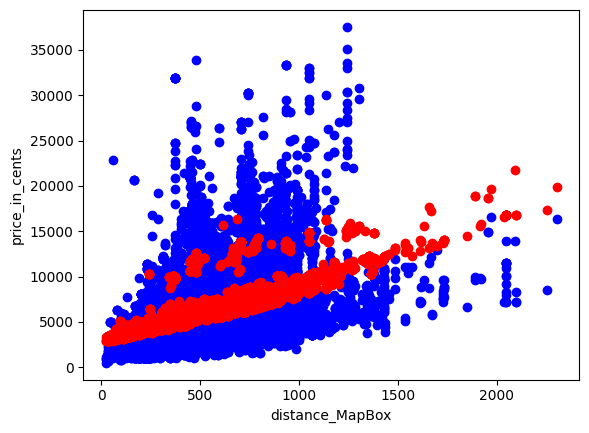

In [690]:
plt.scatter(X_test['distance_MapBox'], y_test, color='blue')
plt.scatter(X_test['distance_MapBox'], y_pred, color='red')
plt.xlabel('distance_MapBox')
plt.ylabel('price_in_cents')
plt.show()

Les valeurs réelles sont en bleu, les valeurs réelles - en rouge. Le modèle montre bien que plus la distance est élevée - plus le prix est élevé aussi. Mais on a vu et ici on le voit encore une fois que la distance et la durée ne suffisent pas pour prédire le prix.

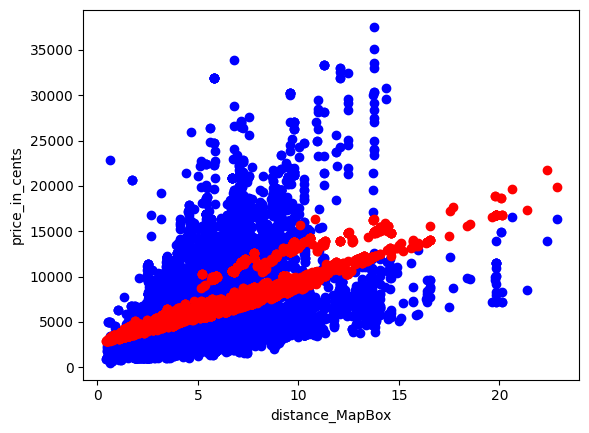

In [691]:
plt.scatter(X_test['duree_MapBox'], y_test, color='blue')
plt.scatter(X_test['duree_MapBox'], y_pred, color='red')
plt.xlabel('distance_MapBox')
plt.ylabel('price_in_cents')
plt.show()

Le modèle ne fait pas un bon travail de prédiction et le coefficient de détermination linéaire de Pearson R2 le confirme :

In [692]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.2109188234817534


# Prédiction de la durée du trajet

Une régression linéaire pour prédire la durée du trajet étant donné la distance.

In [693]:
X = ticket_data_linear['distance_MapBox'].values.reshape(-1, 1)
y = ticket_data_linear['duree_MapBox']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [694]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

0.5740513459669292


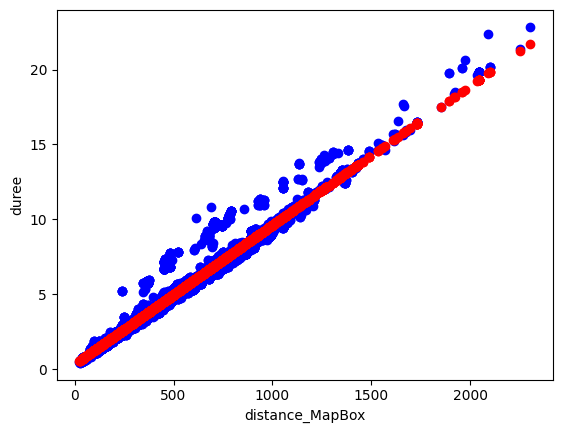

In [695]:
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red')
plt.xlabel('distance_MapBox')
plt.ylabel('duree')
plt.show()

In [696]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.9515064819343466


Ici le modèle prédit très bien la durée d'un trajet étant donné la distance.